<a href="https://colab.research.google.com/github/skaria76/intro-ml-course-winter2025/blob/main/Datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

Saving Dataset1_HAD7001_Lung.csv to Dataset1_HAD7001_Lung.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Dataset1_HAD7001_Lung.csv']))

In [ ]:
df.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


In [ ]:
print(df.shape)

(1465, 12)


In [ ]:
# Identify column names
print(df.columns)

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol Usage', 'Genetic Risk',
       'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Severity'],
      dtype='object')


In [ ]:
import numpy as np

In [ ]:
# Generate summary stats
print(df.describe())

               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000   
max      73.000000     2.000000       8.000000       8.000000      7.000000   

       Lung Disease      Obesity      Smoking  Passive Smoker   Chest Pain  \
count   1465.000000  1465.000000  1465.000000     1465.000000  1465.000000   
mean       3.741297     3.844369     3.425256        3.606826     3.817065   
std        1.899984     2.072213     2.273040        2

In [ ]:
# Check for missing values in each column
print(df.isna().sum())

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64


## Findings

### - There are no missing values

### - Age is a continuous value, the remaining features are categorical

### - Categorical values have already been represented numerically

### - All categorical values (besides gender, which is binary) are represented on an ordinal scale, meaning no need for one-hot encoding

In [ ]:
# Renaming the column Gender to Sex
df = df.rename(columns={'Gender': 'Sex'})
df

,Age,Sex,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,24,1,6,1,3,1,2,2,3,3,2,3
1461,53,1,6,2,2,1,3,4,2,3,1,3
1462,62,1,6,8,1,1,4,3,3,2,2,3
1463,29,1,6,1,2,3,2,4,1,1,3,3


In [ ]:
# count the number of males and females represented in the dataset
counts = df['Sex'].value_counts()
print(counts)

Sex
1    872
2    593
Name: count, dtype: int64


Findings: There are more males in the data using the key provided (gender/sex 1=male)  there is an error in the datathon explanation on Quercus:
"The dataset includes records from 872 women and 593 men, ranging in age from 14 to 73 years. This wide age range provides a valuable perspective on how age interacts with other lung cancer risk factors. The variables are: Age (years), Gender (1 = male), Air Pollution, Alcohol Usage, Genetic Risk, Lung Disease, Obesity, Smoking, Passive Smoker (exposure to secondhand smoke), Chest Pain, Coughing up Blood, and Severity (Lung Cancer Severity).  "

In [ ]:
severity_counts = df['Severity'].value_counts()

print(severity_counts)

Severity
3    465
2    365
1    332
0    303
Name: count, dtype: int64


<ipython-input-20-554405b64f50>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")


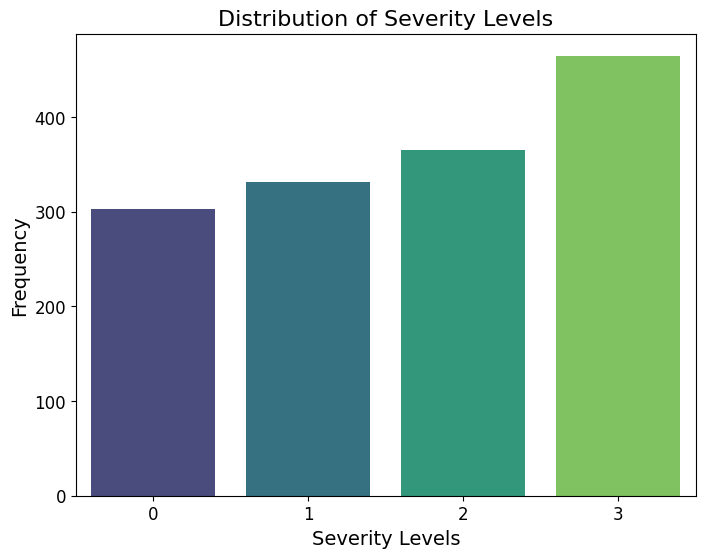

In [ ]:
severity_counts2 = df['Severity'].value_counts().sort_index()
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Severity Levels", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Severity Levels", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

The dataset introduction does not contain a key for the severity, however based on the info provided we can assume Severity 3 = healthy indiviuals
"The dataset focuses on lung cancer risk factors, containing information from 1,000 lung cancer patients of different severity levels and 465 individuals who were screened for lung cancer but were found healthy. "

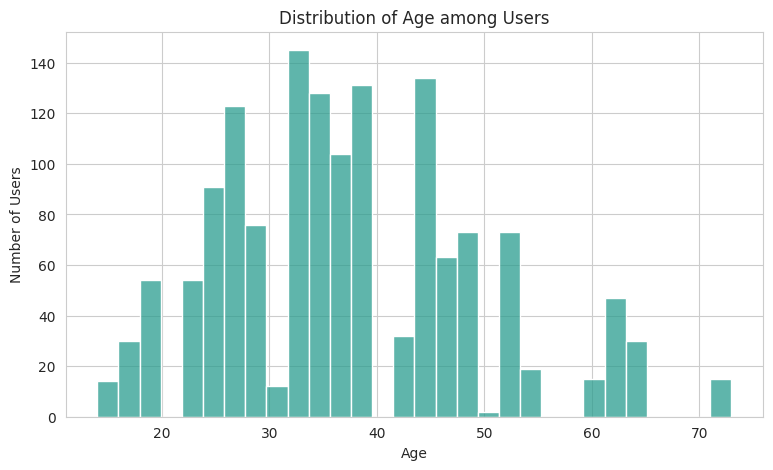

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(df['Age'], bins=30, kde=False, color='#2a9d8f')
plt.title('Distribution of Age among Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

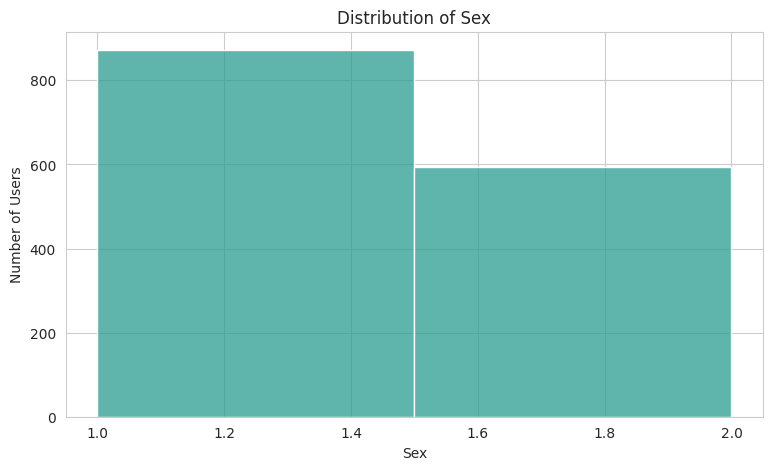

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(df['Sex'], bins=2, kde=False, color='#2a9d8f')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
# Map severity 0 1 2 3 to labels low medium high healthy

# Assuming 'df' is your DataFrame from the previous code

# Create a mapping dictionary
severity_mapping = {0: 'low', 1: 'medium', 2: 'high', 3: 'healthy'}

# Use the map function to create a new column 'SeverityLabel'
df['SeverityLabel'] = df['Severity'].map(severity_mapping)

# Now you have a new column 'SeverityLabel' with the corresponding labels.
print(df.head())

   Age  Sex  Air Pollution  Alcohol Usage  Genetic Risk  Lung Disease  \
0   33    1              2              4             3             2   
1   17    1              3              1             4             2   
2   35    1              4              5             5             4   
3   37    1              7              7             6             7   
4   46    1              6              8             7             6   

   Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Severity  \
0        4        3               2           2                  4         0   
1        2        2               4           2                  3         1   
2        7        2               3           4                  8         2   
3        7        7               7           7                  8         2   
4        7        8               7           7                  9         2   

  SeverityLabel  
0           low  
1        medium  
2          high  
3       

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE

In [ ]:
# split data to features and label
X = df[['Age', 'Sex', 'Air Pollution', 'Alcohol Usage', 'Genetic Risk',
       'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood']]
y = df['SeverityLabel']  #using labels

In [ ]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  #using 30% as test data

In [ ]:
# scale the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# initialize the K-NN classifier and fit the model

knn = KNeighborsClassifier(n_neighbors=3)  # Setting K
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict using the test data.

y_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[127   0   7  15]
 [  0 110   0   0]
 [  1   0  87   0]
 [  0   0   1  92]]
              precision    recall  f1-score   support

     healthy       0.99      0.85      0.92       149
        high       1.00      1.00      1.00       110
         low       0.92      0.99      0.95        88
      medium       0.86      0.99      0.92        93

    accuracy                           0.95       440
   macro avg       0.94      0.96      0.95       440
weighted avg       0.95      0.95      0.95       440



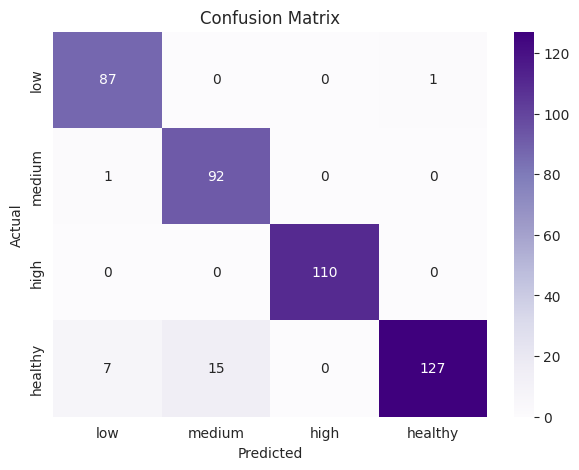

In [ ]:
# Get unique classes
classes = df['SeverityLabel'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

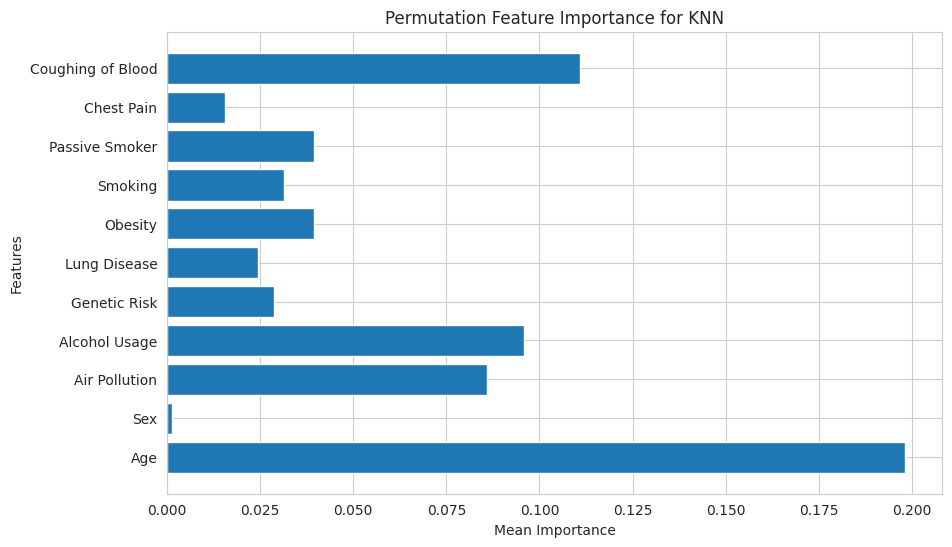

Age: 0.19818181818181815
Sex: 0.0013636363636363225
Air Pollution: 0.08590909090909091
Alcohol Usage: 0.09590909090909087
Genetic Risk: 0.028636363636363616
Lung Disease: 0.024545454545454516
Obesity: 0.03954545454545451
Smoking: 0.03136363636363637
Passive Smoker: 0.03954545454545451
Chest Pain: 0.015454545454545433
Coughing of Blood: 0.11090909090909089


In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# Perform permutation importance
perm_importance = permutation_importance(knn, X_test, y_test, scoring='accuracy', random_state=42)

# Extract feature importance
feature_importances = perm_importance.importances_mean
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Mean Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importance for KNN')
plt.show()

# Print feature importance
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")
